In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle                             
!cp kaggle.json ~/.kaggle/   
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c ventilator-pressure-prediction

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '/content/*.zip'

Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Archive:  /content/sample_submission.csv.zip

Archive:  /content/test.csv.zip

3 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
train_df.shape

(6036000, 8)

In [ ]:
train_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [ ]:
test_df.shape

(4024000, 7)

In [ ]:
test_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out
count,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06
mean,2.012000e+06,6.292796e+04,2.710785e+01,2.607038e+01,1.307083e+00,7.338098e+00,6.203864e-01
std,1.161629e+06,3.624924e+04,1.954281e+01,1.717103e+01,7.658902e-01,1.350955e+01,4.852908e-01
min,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.006001e+06,3.153050e+04,5.000000e+00,1.000000e+01,6.428454e-01,4.096735e-01,0.000000e+00
50%,2.012000e+06,6.305750e+04,2.000000e+01,2.000000e+01,1.308083e+00,4.377512e+00,1.000000e+00
75%,3.018000e+06,9.433325e+04,5.000000e+01,5.000000e+01,1.965240e+00,4.983472e+00,1.000000e+00
max,4.024000e+06,1.257480e+05,5.000000e+01,5.000000e+01,2.935203e+00,1.000000e+02,1.000000e+00


In [ ]:
tr_br_id = train_df.breath_id.unique()
ts_br_id = test_df.breath_id.unique()

common_br_id = []

for el in ts_br_id:
  if el in tr_br_id:
    common_br_id.append(el)
print(f"Common ids on train and test data : {len(common_br_id)}")

Common ids on train and test data : 0


In [ ]:
train_df.drop_duplicates(['breath_id', 'time_step'], inplace = True)

In [ ]:
train_df.drop('breath_id', 1, inplace = True)
test_df.drop('breath_id', 1, inplace = True)

In [ ]:
train_df.isnull().sum()

id           0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [ ]:
test_df.isnull().sum()

id           0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

In [ ]:
train_df.dtypes

id             int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

In [ ]:
train_df.sort_values(by=['time_step'], inplace = True)
train_df.head()

,id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.0,0.083334,0,5.837492
4049920,4049921,50,20,0.0,1.196597,0,6.118700
4050000,4050001,20,10,0.0,3.138084,0,5.415679
4050080,4050081,50,10,0.0,1.593019,0,3.798729
369120,369121,50,50,0.0,0.000000,0,6.681117


In [ ]:
test_id = test_df.id

In [ ]:
train_df.drop('id', 1, inplace = True)
test_df.drop('id', 1, inplace = True)

In [ ]:
train_df.head()

,R,C,time_step,u_in,u_out,pressure
0,20,50,0.0,0.083334,0,5.837492
4049920,50,20,0.0,1.196597,0,6.118700
4050000,20,10,0.0,3.138084,0,5.415679
4050080,50,10,0.0,1.593019,0,3.798729
369120,50,50,0.0,0.000000,0,6.681117


In [ ]:
train_df['R3C'] = train_df.R**3*train_df.C
test_df['R3C'] = test_df.R**3*test_df.C

In [ ]:
train_df.head()

,R,C,time_step,u_in,u_out,pressure,R3C
0,20,50,0.0,0.083334,0,5.837492,400000
4049920,50,20,0.0,1.196597,0,6.118700,2500000
4050000,20,10,0.0,3.138084,0,5.415679,80000
4050080,50,10,0.0,1.593019,0,3.798729,1250000
369120,50,50,0.0,0.000000,0,6.681117,6250000


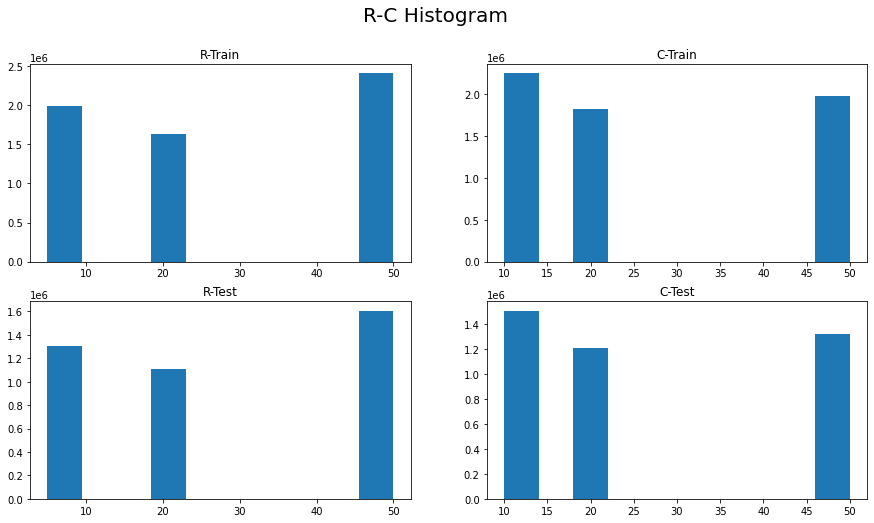

In [ ]:
ax, fig = plt.subplots(2, 2, figsize = (15, 8))
plt.suptitle('R-C Histogram', size = 20)
plt.subplot(2, 2, 1)
plt.hist(train_df.R)
plt.title('R-Train')
plt.subplot(2, 2, 2)
plt.hist(train_df.C)
plt.title('C-Train')
plt.subplot(2, 2, 3)
plt.hist(test_df.R)
plt.title('R-Test')
plt.subplot(2, 2, 4)
plt.hist(test_df.C)
plt.title('C-Test')
plt.show()

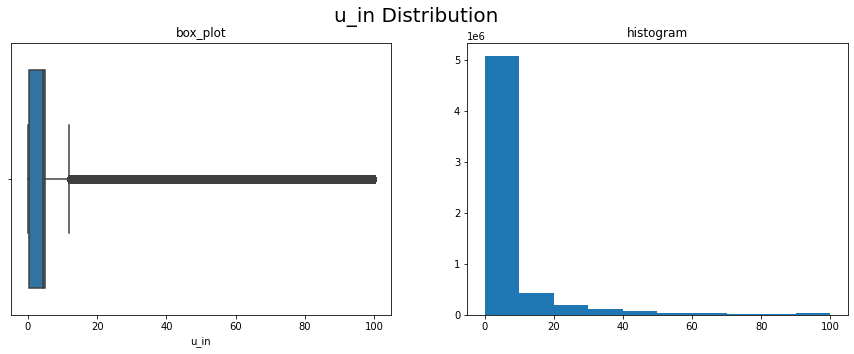

In [ ]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.suptitle('u_in Distribution', size = 20)
plt.subplot(1, 2, 1)
sns.boxplot(train_df.u_in)
plt.title('box_plot')
plt.subplot(1, 2, 2)
plt.hist(train_df.u_in)
plt.title('histogram')
plt.show()

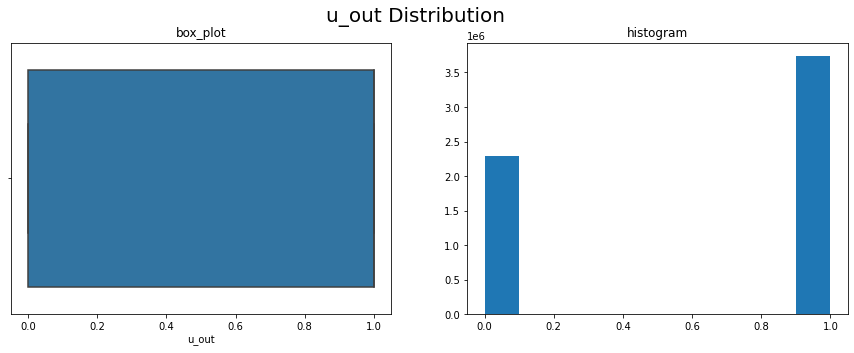

In [ ]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.suptitle('u_out Distribution', size = 20)
plt.subplot(1, 2, 1)
sns.boxplot(train_df.u_out)
plt.title('box_plot')
plt.subplot(1, 2, 2)
plt.hist(train_df.u_out)
plt.title('histogram')
plt.show()

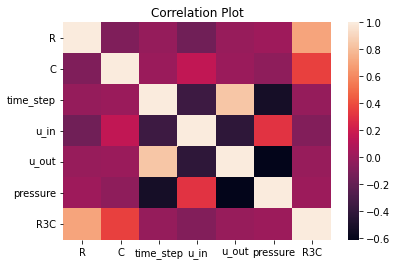

In [ ]:
corr_data = train_df.corr()
sns.heatmap(corr_data)
plt.title('Correlation Plot')
plt.show()

In [ ]:
train_df.drop(['R','C'], 1, inplace = True)
test_df.drop(['R','C'], 1, inplace = True)

In [ ]:
train_df.head()

,time_step,u_in,u_out,pressure,R3C
0,0.0,0.083334,0,5.837492,400000
4049920,0.0,1.196597,0,6.118700,2500000
4050000,0.0,3.138084,0,5.415679,80000
4050080,0.0,1.593019,0,3.798729,1250000
369120,0.0,0.000000,0,6.681117,6250000


In [ ]:
test_df.head()

,time_step,u_in,u_out,R3C
0,0.000000,0.000000,0,2500
1,0.031904,7.515046,0,2500
2,0.063827,14.651675,0,2500
3,0.095751,21.230610,0,2500
4,0.127644,26.320956,0,2500


In [ ]:
for col in ['time_step', 'u_in', 'u_out']:
  print(f"[Train data][{col}] | Minimum Value : {min(train_df[col])} | Maximum Value : {max(train_df[col])}")
  print(f"[Test data][{col}] | Minimum Value : {min(test_df[col])} | Maximum Value : {max(test_df[col])}")

[Train data][time_step] | Minimum Value : 0.0 | Maximum Value : 2.9372379779815674
[Test data][time_step] | Minimum Value : 0.0 | Maximum Value : 2.9352025985717773
[Train data][u_in] | Minimum Value : 0.0 | Maximum Value : 100.0
[Test data][u_in] | Minimum Value : 0.0 | Maximum Value : 100.0
[Train data][u_out] | Minimum Value : 0 | Maximum Value : 1
[Test data][u_out] | Minimum Value : 0 | Maximum Value : 1


In [ ]:
def minmaxscaler(train_data, test_data):
  min_val = min(train_data)
  max_val = max(train_data)
  return (train_data - min_val) / (max_val - min_val) , (test_data - min_val) / (max_val - min_val)

for col in ['time_step', 'u_in', 'u_out']:
  train_df[col], test_df[col] = minmaxscaler(train_df[col], test_df[col])

In [ ]:
train_df.head()

,time_step,u_in,u_out,pressure,R3C
0,0.0,0.000833,0.0,5.837492,400000
4049920,0.0,0.011966,0.0,6.118700,2500000
4050000,0.0,0.031381,0.0,5.415679,80000
4050080,0.0,0.015930,0.0,3.798729,1250000
369120,0.0,0.000000,0.0,6.681117,6250000


In [ ]:
test_df.head()

,time_step,u_in,u_out,R3C
0,0.000000,0.000000,0.0,2500
1,0.010862,0.075150,0.0,2500
2,0.021730,0.146517,0.0,2500
3,0.032599,0.212306,0.0,2500
4,0.043457,0.263210,0.0,2500


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df = train_df.sample(frac = 0.1)

In [ ]:
X, y = train_df.drop('pressure', 1) , train_df.pressure

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((482880, 4), (120720, 4), (482880,), (120720,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [ ]:
model = rfr(n_estimators = 50)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9598914531279202

In [ ]:
test_df.shape

(4024000, 4)

In [ ]:
prediction = []
n = test_df.shape[0] // 100
for i in range(100):
  start_index = n*i
  end_index = (i+1)*n if i!=99 else test_df.shape[0]
  test_patch = test_df.iloc[start_index:end_index]
  pred = model.predict(test_patch)
  for el in pred:
    prediction.append(el)
  print(f"Predicted Patch No. {i+1}...")
print('Testing completed...')

Predicted Patch No. 1...
Predicted Patch No. 2...
Predicted Patch No. 3...
Predicted Patch No. 4...
Predicted Patch No. 5...
Predicted Patch No. 6...
Predicted Patch No. 7...
Predicted Patch No. 8...
Predicted Patch No. 9...
Predicted Patch No. 10...
Predicted Patch No. 11...
Predicted Patch No. 12...
Predicted Patch No. 13...
Predicted Patch No. 14...
Predicted Patch No. 15...
Predicted Patch No. 16...
Predicted Patch No. 17...
Predicted Patch No. 18...
Predicted Patch No. 19...
Predicted Patch No. 20...
Predicted Patch No. 21...
Predicted Patch No. 22...
Predicted Patch No. 23...
Predicted Patch No. 24...
Predicted Patch No. 25...
Predicted Patch No. 26...
Predicted Patch No. 27...
Predicted Patch No. 28...
Predicted Patch No. 29...
Predicted Patch No. 30...
Predicted Patch No. 31...
Predicted Patch No. 32...
Predicted Patch No. 33...
Predicted Patch No. 34...
Predicted Patch No. 35...
Predicted Patch No. 36...
Predicted Patch No. 37...
Predicted Patch No. 38...
Predicted Patch No. 3

In [ ]:
prediction_submission = pd.DataFrame({'id':test_id, 'pressure':prediction})
prediction_submission.head()

,id,pressure
0,1,6.295502
1,2,6.163694
2,3,6.893430
3,4,7.388357
4,5,8.745188


In [ ]:
prediction_submission.to_csv('rfr_submission.csv', index = False)

In [ ]:
!kaggle competitions submit -c ventilator-pressure-prediction -f rfr_submission.csv -m "Submission with RandomForestRegressor with all 5 features"

100% 99.6M/99.6M [00:08<00:00, 12.0MB/s]
Successfully submitted to Google Brain - Ventilator Pressure Prediction